# stage 2 male averaged

In [1]:
import numpy as np
import subprocess
import matplotlib.pyplot as plt
import pandas as pd

from functions_lick_rates import (plot_averaged)

In [2]:
HD_mouse = ['443076_m1','443996_m5']
WT_mouse = ['443076_m3']

In [3]:
# Combine both HD and WT mice
all_mice = HD_mouse + WT_mouse

# Loop through each mouse and execute the corresponding notebook
for mouse in all_mice:
    notebook_name = f"stage2_{mouse}_lick_rates.ipynb"
    
    # Run the notebook and save the executed version as 'executed_notebook_'
    command = f'jupyter nbconvert --to notebook --execute {notebook_name} --output executed_{notebook_name}'
    
    # Execute the command
    subprocess.run(command, shell=True)

print("All notebooks executed successfully.")

All notebooks executed successfully.


# HD averaged

In [4]:
# List to hold dataframes
HD_data_list = []

# Load the .npy data for each mouse (HD)
for mouse in HD_mouse:
    file_path = f"X:/RaymondLab/1_Kai/3_processed_data/7_lick_rate_csv/lick_rate_stage2_{mouse}.npy"
    try:
        # Load the .npy file into a numpy array
        data = np.load(file_path)
        
        # Create a DataFrame from the data
        HD_df = pd.DataFrame(data, columns=['day_number', 'left_lick', 'right_lick', 'total'])
        
        # Append the dataframe to the list
        HD_data_list.append(HD_df)
    except FileNotFoundError:
        print(f"File not found: {file_path}")

# Concatenate all dataframes into a single dataframe
all_HD_data = pd.concat(HD_data_list)

# Group by 'day_number' and calculate the mean for each column (except 'day_number')
average_HD_data = all_HD_data.groupby('day_number').mean().reset_index()

# Optionally, you can save the average data to a CSV file
average_HD_data.to_csv("X:/RaymondLab/1_Kai/3_processed_data/7_lick_rate_csv/average_HD_data.csv", index=False)

# Print the averaged data
print(average_HD_data)

   day_number   left_lick  right_lick  total
0         1.0   73.962585   92.867647   82.0
1         2.0   91.931818   86.363636   89.5
2         3.0   98.214286  100.000000   99.0
3         4.0   93.269231   85.819892   88.0
4         5.0  100.000000  100.000000  100.0


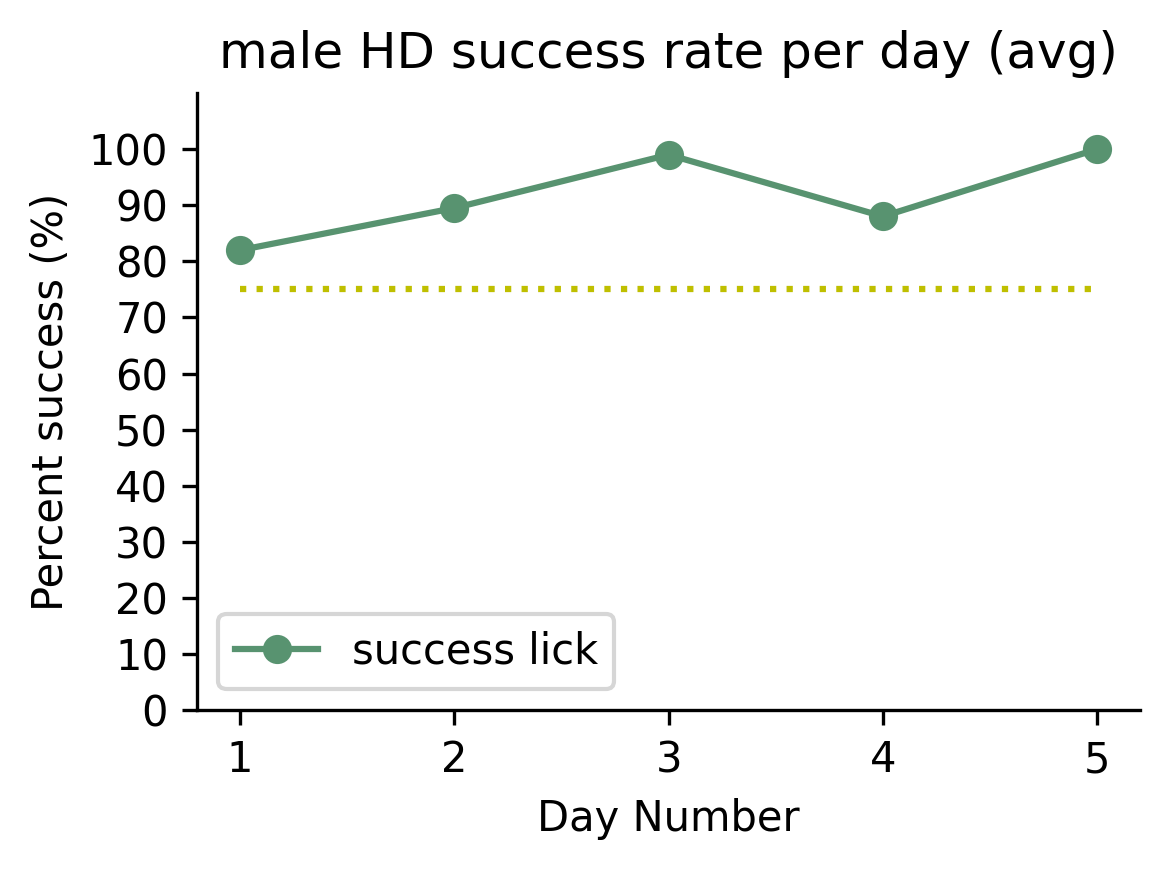

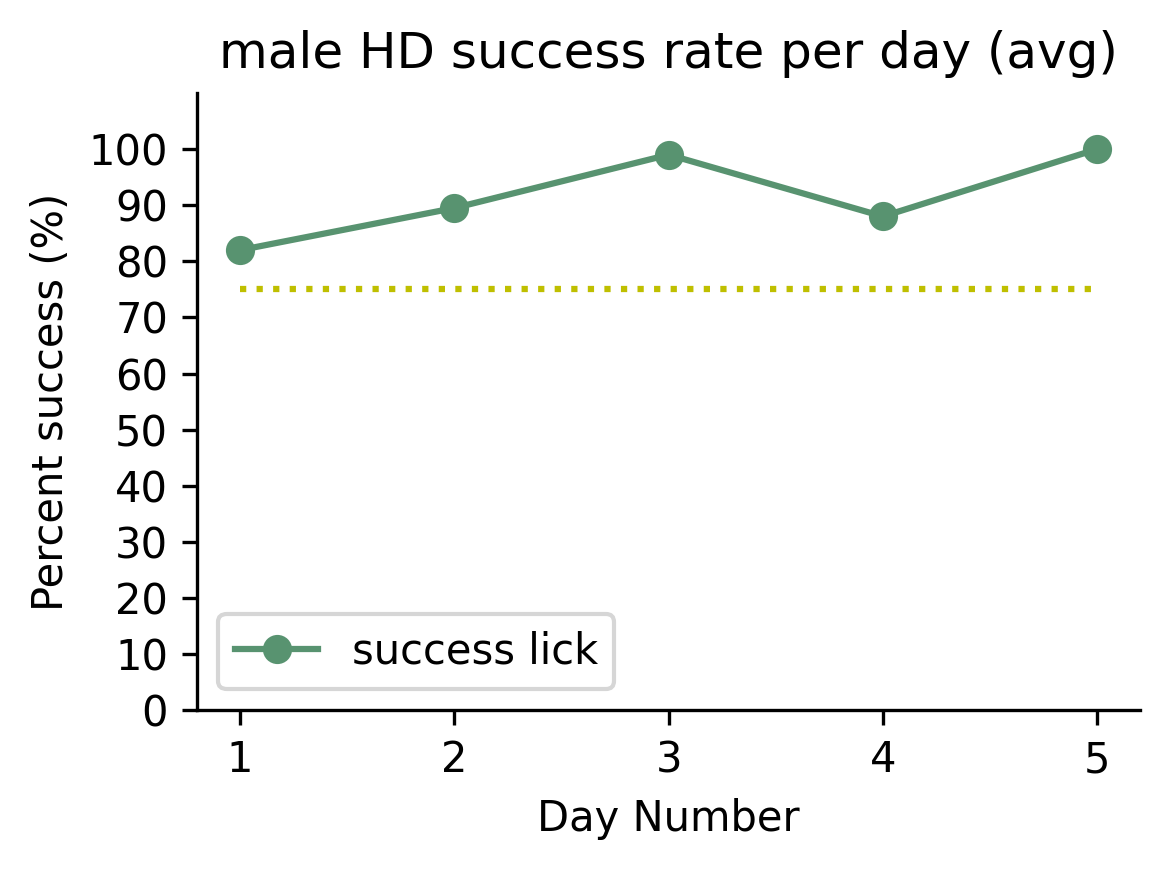

In [9]:
plot_averaged(average_HD_data, condition="HD", nogo = "FALSE", export_path_nogo=f"X:/RaymondLab/1_Kai/3_processed_data/7_lick_rate_csv/exported_figures/male_HD_averaged_lick_rates.png", dpi =300)

# WT averaged

In [6]:
# List to hold dataframes
WT_data_list = []

# Load the .npy data for each mouse (HD)
for mouse in WT_mouse:
    file_path = f"X:/RaymondLab/1_Kai/3_processed_data/7_lick_rate_csv/lick_rate_stage2_{mouse}.npy"
    try:
        # Load the .npy file into a numpy array
        WT_data = np.load(file_path)
        
        # Create a DataFrame from the data
        WT_df = pd.DataFrame(WT_data, columns=['day_number', 'left_lick', 'right_lick', 'total'])
        
        # Append the dataframe to the list
        WT_data_list.append(WT_df)
    except FileNotFoundError:
        print(f"File not found: {file_path}")

# Concatenate all dataframes into a single dataframe
all_WT_data = pd.concat(WT_data_list)

# Group by 'day_number' and calculate the mean for each column (except 'day_number')
average_WT_data = all_WT_data.groupby('day_number').mean().reset_index()

# Optionally, you can save the average data to a CSV file
average_WT_data.to_csv("X:/RaymondLab/1_Kai/3_processed_data/7_lick_rate_csv/average_WT_data.csv", index=False)

# Print the averaged data
print(average_WT_data)


   day_number  left_lick  right_lick  total
0         1.0  77.551020   66.666667   72.0
1         2.0  71.428571   49.019608   60.0
2         3.0  73.684211   45.161290   56.0
3         4.0  97.727273   71.428571   83.0
4         5.0  98.245614   90.697674   95.0
5         6.0  85.416667   80.769231   83.0


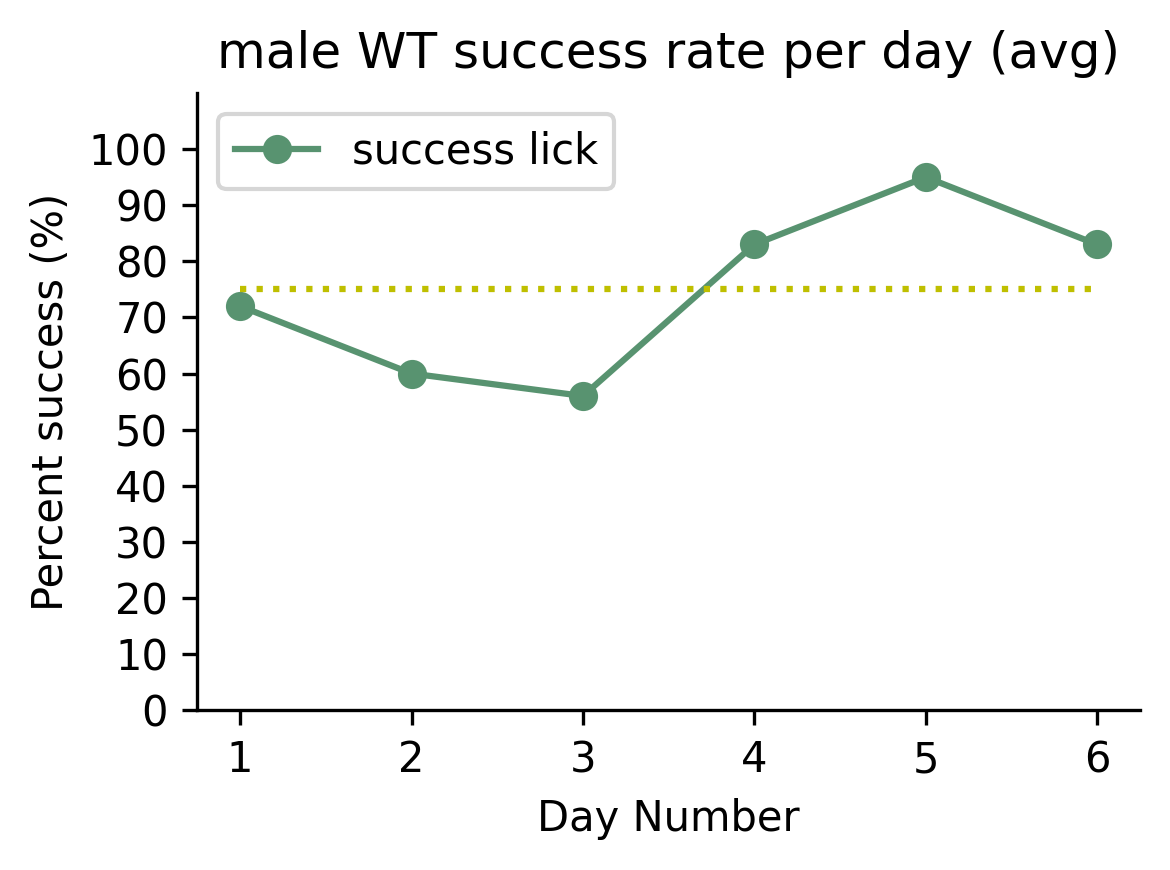

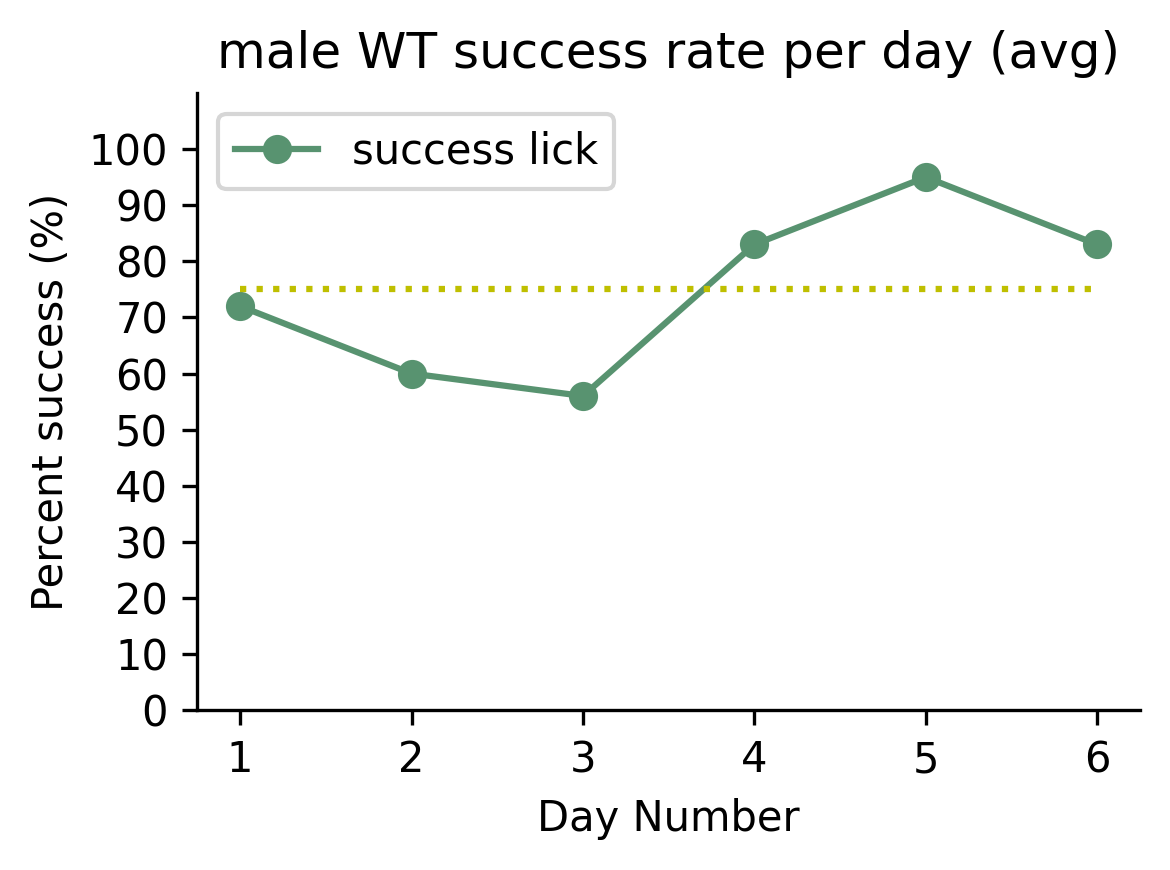

In [8]:
plot_averaged(average_WT_data, condition="WT", nogo = "FALSE", export_path_nogo=f"X:/RaymondLab/1_Kai/3_processed_data/7_lick_rate_csv/exported_figures/male_WT_averaged_lick_rates.png", dpi=300)